Loading the Dataset

In [28]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

In [29]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [30]:
# metadata 
print(adult.metadata) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [31]:
# variable information 
print(adult.variables) 

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [32]:
df = pd.concat([X, y], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
df.to_csv("Data\dataset.csv")

Cleaning the Dataset

In [58]:
df = pd.read_csv("Data\dataset.csv")

In [59]:
# Get the number of rows in the entire dataset
num_rows = df.shape[0]

# Print the number of rows
print("Number of rows in the entire dataset:", num_rows)


Number of rows in the entire dataset: 48842


In [60]:
# Check unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)

Unique values for column 'Unnamed: 0':
[    0     1     2 ... 48839 48840 48841]
Unique values for column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
Unique values for column 'workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
Unique values for column 'fnlwgt':
[ 77516  83311 215646 ... 173449  89686 350977]
Unique values for column 'education':
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Unique values for column 'education-num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unique values for column 'marital-status':
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'


In [61]:
# Count the number of rows containing "?" values
rows_with_question_mark = df.apply(lambda x: x.astype(str).str.contains('\?').any(), axis=1).sum()

# Print the number of rows containing "?" values
print("Number of rows containing '?' values:", rows_with_question_mark)


Number of rows containing '?' values: 2399


In [62]:
# Count the number of rows containing "?" values for each column
question_mark_counts_per_column = df.apply(lambda x: x.astype(str).str.contains('\?').sum())

# Print the number of rows containing "?" values for each column
print("Number of rows containing '?' values for each column:")
print(question_mark_counts_per_column)


Number of rows containing '?' values for each column:
Unnamed: 0           0
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


We are replacing the "?" values with Mode.

In [63]:
# Impute missing values with mode for categorical columns
for column in ['workclass', 'occupation', 'native-country']:
    mode_value = df[column].mode()[0]  # Calculate mode
    df[column].replace('?', mode_value, inplace=True)  # Replace '?' with mode

# Verify that missing values have been imputed
question_mark_counts_per_column = df.apply(lambda x: x.astype(str).str.contains('\?').sum())
print("Number of rows containing '?' values for each column after imputation:")
print(question_mark_counts_per_column)


C:\Users\chanu\AppData\Local\Temp\ipykernel_11592\3476587457.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace('?', mode_value, inplace=True)  # Replace '?' with mode


Number of rows containing '?' values for each column after imputation:
Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [64]:
# Count the number of rows containing null values
rows_with_null_values = df.isnull().any(axis=1).sum()

# Print the number of rows containing null values
print("Number of rows containing null values:", rows_with_null_values)


Number of rows containing null values: 1221


In [65]:
# Count the number of null values for each column
null_values_per_column = df.isnull().sum()

# Print the number of null values for each column
print("Number of null values for each column:")
print(null_values_per_column)

Number of null values for each column:
Unnamed: 0          0
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [66]:
# Drop rows with null values
df.dropna(inplace=True)

# Verify that null values have been dropped
null_values_per_column = df.isnull().sum()
print("Number of null values for each column after dropping rows with null values:")
print(null_values_per_column)


Number of null values for each column after dropping rows with null values:
Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [67]:
# Check if any column contains "?" values
contains_question_mark = df.apply(lambda x: x.astype(str).str.contains('\?').any())

# Print columns containing "?" values
print("Columns containing '?' values:")
print(contains_question_mark[contains_question_mark].index)

# Check for columns containing null values
contains_null = df.isnull().any()

# Print columns containing null values
print("Columns containing null values:")
print(contains_null[contains_null].index)

Columns containing '?' values:
Index([], dtype='object')
Columns containing null values:
Index([], dtype='object')


In [68]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [69]:
print(df)

       Unnamed: 0  age         workclass  fnlwgt  education  education-num  \
0               0   39         State-gov   77516  Bachelors             13   
1               1   50  Self-emp-not-inc   83311  Bachelors             13   
2               2   38           Private  215646    HS-grad              9   
3               3   53           Private  234721       11th              7   
4               4   28           Private  338409  Bachelors             13   
...           ...  ...               ...     ...        ...            ...   
47616       48836   33           Private  245211  Bachelors             13   
47617       48837   39           Private  215419  Bachelors             13   
47618       48839   38           Private  374983  Bachelors             13   
47619       48840   44           Private   83891  Bachelors             13   
47620       48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation   relationship  \


In [70]:
# Check for duplicate rows
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Print the result
if num_duplicates > 0:
    print("There are duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")


There are no duplicate rows in the DataFrame.


In [71]:
df = df.drop_duplicates()#drop duplicate rows

In [72]:
print(df)

       Unnamed: 0  age         workclass  fnlwgt  education  education-num  \
0               0   39         State-gov   77516  Bachelors             13   
1               1   50  Self-emp-not-inc   83311  Bachelors             13   
2               2   38           Private  215646    HS-grad              9   
3               3   53           Private  234721       11th              7   
4               4   28           Private  338409  Bachelors             13   
...           ...  ...               ...     ...        ...            ...   
47616       48836   33           Private  245211  Bachelors             13   
47617       48837   39           Private  215419  Bachelors             13   
47618       48839   38           Private  374983  Bachelors             13   
47619       48840   44           Private   83891  Bachelors             13   
47620       48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation   relationship  \


In [73]:
# Remove duplicate columns
df_T = df.T.drop_duplicates().T

In [74]:
# If needed, you can also reset the index after removing rows or columns
df = df.reset_index(drop=True)

In [75]:
df['income'].value_counts()

income
<=50K     24720
<=50K.    11360
>50K       7841
>50K.      3700
Name: count, dtype: int64

In [76]:
# Replace "." with an empty string in the "income" column
df['income'] = df['income'].str.replace('.', '')

# Count the values in the "income" column after removing "."
print(df['income'].value_counts())


income
<=50K    36080
>50K     11541
Name: count, dtype: int64


In [77]:
# Remove the "Unnamed" column
df.drop(columns="Unnamed: 0", inplace=True)

In [78]:
print(df)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
47616   33           Private  245211  Bachelors             13   
47617   39           Private  215419  Bachelors             13   
47618   38           Private  374983  Bachelors             13   
47619   44           Private   83891  Bachelors             13   
47620   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation   relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                D

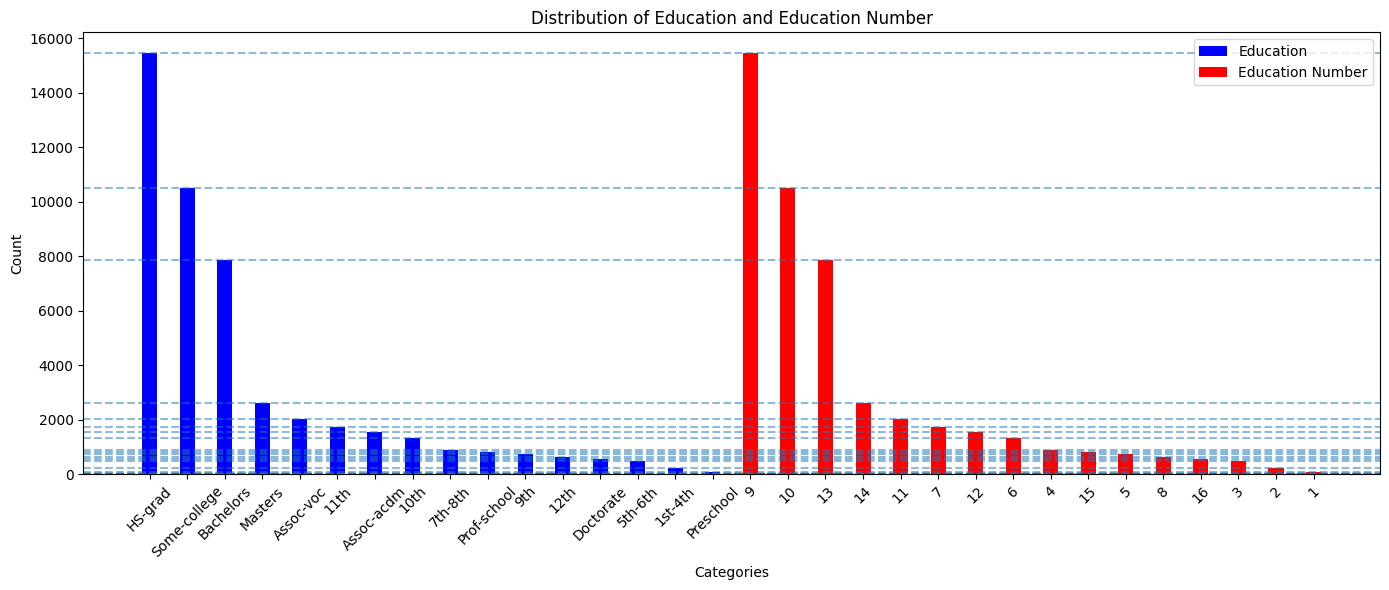

In [95]:
import numpy as np
# Count the occurrences of each category in the 'education' and 'education-num' features
education_counts = df['education'].value_counts()
education_num_counts = df['education-num'].value_counts()

# Get unique categories from 'education' and 'education-num'
categories_education = education_counts.index.astype(str)
categories_education_num = education_num_counts.index.astype(str)

# Combine categories from both columns
combined_categories = np.union1d(categories_education, categories_education_num)

# Create a figure and axes
plt.figure(figsize=(14, 6))

# Plot bar plot for education
plt.bar(categories_education, education_counts, width=0.4, color='b', label='Education')

# Plot bar plot for education-num
plt.bar(categories_education_num, education_num_counts, width=0.4, color='r', label='Education Number')

# Add horizontal lines
for category in combined_categories:
    plt.axhline(y=education_counts.get(category, 0), linestyle='--', alpha=0.5)


# Add title and labels
plt.title('Distribution of Education and Education Number')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(combined_categories, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



Dropping "education-number" beacuse it's the same as "education" column and its hard to understand compared to education column

In [97]:
# Remove the "Unnamed" column
df.drop(columns="education-num", inplace=True)

In [98]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [99]:
df.to_csv("Data\cleaned_dataset.csv")

ENCODING

In [100]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [101]:
df=pd.read_csv("Data\cleaned_dataset.csv")

In [102]:
# Split to X and y
X = df.drop(columns=['income']) #split income column
y = df['income']

In [103]:
categorical_columns = X.select_dtypes(include=['object']).columns
#Selecting String type data sets for encoding

In [104]:
new_cat=X[categorical_columns]

In [105]:
new_cat.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [106]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(dtype='int')

encode_cat= encoder.fit_transform(new_cat) 
#encoding the needed categorical values

#non-categorical columns selected
X_int = X.select_dtypes(exclude=['object'])

# Convert the one-hot encoded array to a DataFrame
encoded_df = pd.DataFrame(encode_cat.toarray(), columns=encoder.get_feature_names_out(), index=new_cat.index)

# Combine the one-hot encoded DataFrame with the non-categorical columns
encoded_total_X = pd.concat([X_int, encoded_df], axis=1)

# Display the first few rows of the encoded DataFrame
print(encoded_total_X.head())

   Unnamed: 0  age  fnlwgt  capital-gain  capital-loss  hours-per-week  \
0           0   39   77516          2174             0              40   
1           1   50   83311             0             0              13   
2           2   38  215646             0             0              40   
3           3   53  234721             0             0              40   
4           4   28  338409             0             0              40   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                      0                    0                       0   
1                      0                    0                       0   
2                      0                    0                       0   
3                      0                    0                       0   
4                      0                    0                       0   

   workclass_Private  ...  native-country_Portugal  \
0                  0  ...                        0   
1       

In [107]:
# Remove the "Unnamed" column
encoded_total_X.drop(columns="Unnamed: 0", inplace=True)

In [108]:
encoded_total_X.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
encoded_total_X.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
# Save the encoded DataFrame to a new CSV file
encoded_total_X.to_csv("Data/encoded_dataset.csv", index=False)

Splitting the Data

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
df=pd.read_csv("Data\encoded_dataset.csv")

In [189]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(encoded_total_X, y, test_size=0.2, random_state=42)

In [191]:
# Save training and testing datasets to CSV files
X_train.to_csv("Data\X_train.csv", index=False)
X_test.to_csv("Data\X_test.csv", index=False)
y_train.to_csv("Data\y_train.csv", index=False, header=True)
y_test.to_csv("Data\y_test.csv", index=False, header=True)